First we import our libraries and import our dataset

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import our dataset

In [266]:
from sklearn.datasets import load_wine

wine = load_wine()

Get data keys

In [267]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In order to understand this dataset better we will check the description

In [268]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

Convert to pandas DataFrame format

In [269]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

Check all dataframe feature names

In [270]:
print(df.keys())

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


Show the first 5 rows of dataframe

In [271]:
print(df.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

We want to get the whole picture, so we expand the df.head to show all columns

In [272]:
pd.set_option('display.max_columns', None)
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

Checking the shape of the entire dataset

In [273]:
print(df.shape)

(178, 13)


This shows that this dataset has 178 observations and 13 columns

Since the values of the dataset are not equally scaled we need to apply z-score standardization to get all features into the same scale. 
For this, we use Scikit-learn StandardScaler() class which is in the preprocessing submodule in Scikit-learn.

Import Class

In [274]:
from sklearn.preprocessing import StandardScaler

Create object and store in variable Scaler

In [275]:
scaler = StandardScaler()

Using fit to calculate Mean and Standard Deviation

In [276]:
scaler.fit(df)

StandardScaler()

Transform values and store into df_scaled

In [277]:
df_scaled = scaler.transform(df)

Now we are ready to apply PCA to our dataset.

In [278]:
from sklearn.decomposition import PCA

Now we apply PCA with the original number of dimensions to see how well PCA captures the variance of the data

In [279]:
PCA_13 = PCA(n_components=13)
PCA_13.fit(df_scaled)
DF_PCA_13 = PCA_13.transform(df_scaled)

Since we have set n_components = 13 which is the original number of dimensions in our dataset
The % variance explained by 13 components should be 100%

In [280]:
sum(PCA_13.explained_variance_ratio_*100)

100.00000000000001

The explained_variance_ratio_ attribute of PCA returns an array which has the values of the percentage of variance explained by each of the components

In [281]:
PCA_13.explained_variance_ratio_*100

array([36.1988481 , 19.20749026, 11.12363054,  7.06903018,  6.56329368,
        4.93582332,  4.23867932,  2.68074895,  2.2221534 ,  1.93001909,
        1.73683569,  1.29823258,  0.79521489])

In the array above, we can see that there are 13 components.
The first variable alone captures 36.19% of the variability in the dataset and the second variable captures 19.21% of the variability in the dataset by itself and so on.

If we get the cumulative sum of the array we can see the following

In [282]:
np.cumsum(PCA_13.explained_variance_ratio_ * 100)

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

Then we create the following plot for better visualization

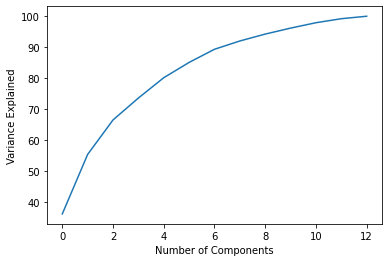

In [283]:
plt.plot(np.cumsum(PCA_13.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.savefig('elbow_plot.png', dpi=100)

By looking at this plot, we can see the following.

In [284]:
print("Variance explained by the First principal component =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[0])
print("Variance explained by the First two principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[1])
print("Variance explained by the First four principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[3])
print("Variance explained by the First six principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[5])
print("Variance explained by the First eight principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[7])
print("Variance explained by the First ten principal components =", np.cumsum(PCA_13.explained_variance_ratio_ * 100)[9])

Variance explained by the First principal component = 36.19884809992633
Variance explained by the First two principal components = 55.406338356935294
Variance explained by the First four principal components = 73.59899907589929
Variance explained by the First six principal components = 85.09811607477045
Variance explained by the First eight principal components = 92.01754434577262
Variance explained by the First ten principal components = 96.16971684450642


In [285]:
PCA_2 = PCA(n_components=2)
PCA_2.fit(df_scaled)
DF_PCA_2 = PCA_2.transform(df_scaled)

In [286]:
DF_PCA_2.shape

(178, 2)

In [287]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

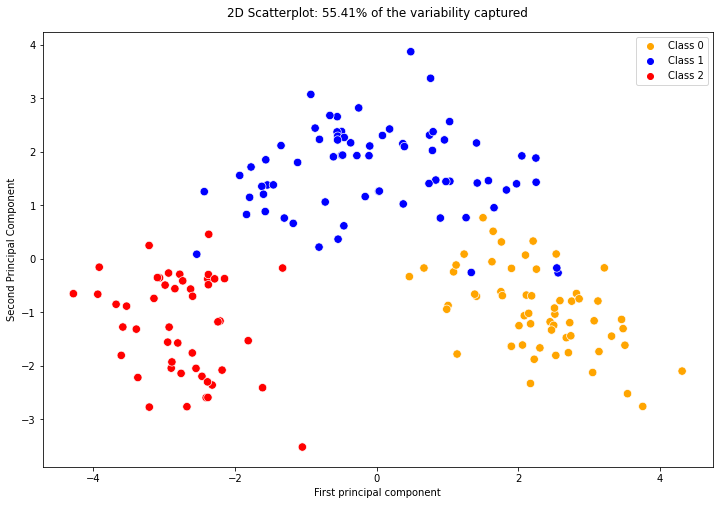

In [288]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=DF_PCA_2[:, 0],y=DF_PCA_2[:, 1], s=70,
        hue=wine.target, palette=['orange', 'blue', 'red'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Class 0', 'Class 1', 'Class 2'])
plt.title("2D Scatterplot: 55.41% of the variability captured", pad=15)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.savefig("2d_scatterplot.png")